## 다중선형회귀
- 독립변수가 2개 이상일 떄 사용
- 단순선형회귀와는 다르게 독립변수의 개수가 늘어나면 모델의 R^2가 증가
- 따라서 독립변수 수에 따라 증가하는 것에 대한 패널티를 적용시킨 AdjustedR^2를 사용한다

#### 회귀분석 검토사항
- 모형이 데이터를 잘 적합하고 있는가?
    - 등분산성, 선형성, 독립성, 정규성
- 회귀 모형이 통계적으로 유의한가?
    - 통계량은 F통계량 사용
- 모형은 데이터를 얼마나 설명할 수 있는가?
    - R^2 확인
- 모형 내의 회귀계수는 유의한가?
- statsmodels.formula.api.ols 사용

In [1]:
## statsmodels를 이용한 단순 선형 회귀
import pandas as pd
import numpy as numpy

house = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv")
house = house[['price', 'sqft_living']]
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [7]:
house

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


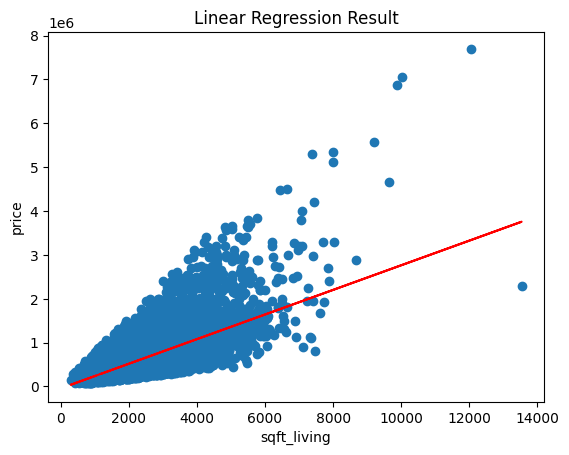

In [11]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

y = house['price']
X = house['sqft_living']

lr = ols('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("sqft_living", fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title("Linear Regression Result")
plt.show()

- 데이터의 분포와 회귀선 시각화 결과 모든 데이터를 잘 설명하지 못하는 것으로 보인다

In [12]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:08:36   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value가 0이므로 회귀모형이 유의하지 않다는 귀무가설을 기각한다
- R^2를 보면 전체 데이터의 49.3%를 설명한다고 할 수 있는데 일반적인 수치로 봤을 때 성능이 좋지 않다
- sqft_living의 회귀계수에 대한 p-value는 0.05보다 작으므로 유의한 변수이다

#### 다중공선성
- 단순회귀와 다중회귀의 차이는 독립변수의 수
- 다중공선성이란 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제
- 다중공선성이 존재하면 정확한 회귀계수 추정이 어렵다
- 보통 VIF(variance inflation factor)의 값이 10이상이라면 다중공선성이 존재한다고 예상한다 (VIF = 1 / (1-R^2))

#### 변수선택법
- 다중공선성이 존재할 경우 변수 삭제 혹은 패널티를 줘서 해결한다
- 하지만 다중회귀에서는 이외에도 변수를 제거해야하는 경우가 있다
- 모델의 독립변수가 증가함에 따라 모델에 영향을 미치는 데이터 관리 비용이 증가한다
- 따라서 종속변수에 유의미한 독립변수만을 선택하여 최선의 회귀모델을 도출하는 과정이 필요하며 F-통계량이나 AIC와 같은 기준값을 이용한다 (AIC = -2ln(L) + 2k)
- 2ln(L)은 모형의 적합도, k는 모형의 추정된 파라미터 개수

1. 전진선택법 : 단순선형회귀에서 하나의 변수씩 추가해가며 모델의 정확도를 높이는 방법
2. 후진제거법 : 모든 변수를 추가하고 유의하지 않은 변수들을 제거하며 모델의 성능을 높이는 방법
3. 단계적선택법 : 변수를 추가, 제거하며 모델의 성능을 높이는 방법

In [13]:
#### 다중선형회귀

cars = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

cars.columns = cars.columns.str.replace(".", "")
model = smf.ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           4.88e-14
Time:                        11:17:35   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
cars[['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [17]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway',
                 data = cars, return_type='dataframe')
vif_list = []

for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])

pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [18]:
### MPGcity 변수 제거 후 
model = smf.ols('Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.28e-14
Time:                        11:22:13   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adj.R^2와 AIC에 큰 변화는 없는 것을 확인

In [27]:
import time
import itertools


def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model":regr, 'AIC':AIC}


# 전진선택법
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []

    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors+[p]+['Intercept']))

    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    print(f'Processed {models.shape[0]}, models on {len(predictors) + 1}, predictors in')
    print(f'selected predictors : {best_model["model"].model.exog_names}, AIC : {best_model[0]}')
    return best_model

# 후진소거법
def backward(X, y, predictors):
    tic = time.time()
    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X, y, list(combo)+['Intercept']))
    models = pd.DataFrame(results) 
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print(f'Processed {models.shape[0]}, models on {len(predictors) + 1}, predictors in {toc - tic}')
    print(f'selected predictors : {best_model["model"].model.exog_names}, AIC : {best_model[0]}')
    return best_model

# 단계적선택법
def Stepwise_model(X, y):
    stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) + 1):
        Forward_result = forward(X, y, predictors)
        print('forward')
        stepmodels.loc[i] = Forward_result
        predictors = stepmodels.loc[i]['model'].model.exog_names
        print('DDDDDDDDDD', stepmodels.loc[i]['model'].model.exog_names)
        predictors = [k for k in predictors if k != 'Intercept']
        Backward_result = backward(X, y, predictors)

        if Backward_result['AIC'] < Forward_result['AIC']:
            stepmodels.loc[i] = Backward_result
            predictors = stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'Intercept']
            print('backward')
        
        if stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = stepmodels.loc[i]['AIC']
    
    toc = time.time()
    print("Total elapsed time:", (tic-toc), 'seconds')
    
    return (stepmodels['model'][len(stepmodels['model'])])

In [28]:
Stepwise_best_model = Stepwise_model(X, y)

Processed 6, models on 1, predictors in
selected predictors : ['Weight', 'Intercept'], AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C50DE21CA0>
forward
DDDDDDDDDD ['Weight', 'Intercept']
Processed 1, models on 2, predictors in 0.0009999275207519531
selected predictors : ['Intercept'], AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C50DE21580>
Processed 5, models on 2, predictors in
selected predictors : ['Weight', 'RPM', 'Intercept'], AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C50DE15A30>
forward
DDDDDDDDDD ['Weight', 'RPM', 'Intercept']
Processed 2, models on 3, predictors in 0.0019998550415039062
selected predictors : ['Weight', 'Intercept'], AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C50DE217F0>
Processed 4, models on 3, predictors in
selected predictors : ['Weight', 'RPM', 'EngineSize', 'Intercept'], AIC : <statsmodels

In [25]:
## 최종 모델 해석
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           6.75e-16
Time:                        11:36:30   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""